## Hypothesis Testing on Medical Data

Loading Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats 
from scipy.stats import t
from scipy.stats import norm
import time
import matplotlib.mlab as mlab
import math

**Sample**

[24.21651518 25.15322824 26.21867811 31.51595229 25.54505453 31.00330042
 29.5465965  19.68497432 23.15005609 26.80233708 26.34843401 25.38830916
 26.5138657  28.63512278 23.81495501 22.74175581 30.11042977 22.05185429
 29.69268604 29.07649568 34.87720689 30.64710037 31.05947269 25.31535133
 29.25259771 22.69598371 30.4977101  24.23015732 29.69263071 23.53867932
 25.67655559 22.59355542 26.73901351 24.06832402 23.31713793 30.6502584
 31.5326345  22.71288579 26.09166539 27.38447069 24.87875003 27.58473236
 22.39825365 28.87198768 26.62593034 24.23655711 18.90533255 27.45439557
 27.57613726 28.90893009 25.51726966 23.73811999 28.35051291 31.82611612
 30.35612502 26.40483527 26.92875536 26.72950308 19.79342932 29.41191972
 22.11708024 20.20107373 28.41107654 27.41191061 30.20972661 26.48559777
 27.97112549 25.88720813 20.02731739 22.61038265 22.02020945 22.81955259
 25.59805211 27.63551919 29.09145541 30.69433497 29.43283473 24.91196947
 32.75718832 29.22828476 30.25608631 27.31668314 27.

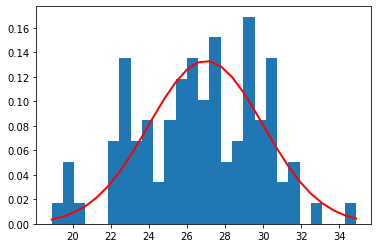

In [ ]:
mu = 27# mean 

sigma=3 # sigma=standard deviation=3, variance = sigmasquare
s = np.random.normal(mu, sigma, 100)
print(s)

count, bins, ignored = plt.hist(s, 27, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

**Population**

[47.15557034 30.40952478 34.19406113 34.3594909  34.55878821 27.27390322
 26.9819524  29.74546994 27.98150276 33.29257742 30.14822694 15.39014488
 37.1747707  29.46620257 27.3470363  41.68285194 30.66288679 26.91106197
 28.11684543 22.90883125 28.21720036 14.95358817 29.30969578 32.01841772
 29.71984048 22.67804132 24.15405343 34.245107   37.78805253 32.95577132
 27.14899361 31.50280769 32.11564282 36.55386791 21.84323987 27.63932545
 30.3161138  32.29733072 32.75425922 32.18521006 27.70108716 26.87616381
 46.17937992 30.23575799 45.49470531 18.36888806 28.88006828 21.38605473
 20.45968384 26.39287816 24.35490524 27.2587265  36.90205409 29.22593382
 19.84093498 33.41568417 34.9739518  20.7458665  33.76506485 38.54290704
 40.41981808 41.94987035 34.7637956  38.98843441 37.34718025 39.43242046
 31.23660134 39.57859521 25.25811791 19.10209324 32.41761931 37.94026866
 22.77013732 28.80811918 23.61863355 38.49500107 32.64784043 33.51307869
 28.94231013 20.0380391  29.03943948 22.93573127 34

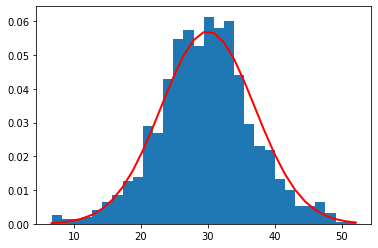

In [ ]:
mu, sigma = 30, 7 # mean and standard deviation=7
s = np.random.normal(mu, sigma, 1000)
print(s)

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

**Hypothesis Testing**



*H0: Medicine has no effect on recovery days because of medicine X
*HA: Medicine Reduces Recovery days, therefore it is effective

H0: mean=mu_0=30
HA: mean  <30




If this z-statistic is less than z-critical then we accept the null hypothesis, 
otherwise we reject the null and accept the alternative hypothesis.

In [ ]:
α = 0.05
z_critical = -1.645 # derived from z table alpha level of 0.05 and one-tailed test
mu=30
sigma=7
x_bar = 27 #Sample Mean
N = 100 #Sample Size
SE = sigma/np.sqrt(N) #Standard Error
z_stat = (x_bar - mu)/SE # Z Statistic
print("Z-Statistic:",round(z_stat,2))#-4.29

Z-Statistic: -4.29


z-statistic is less than z-critical for a one-tailed Z-test , therefore we reject the null hypothesis.

T- Statistic

In [ ]:
mu = 30 # Population Mean
std=3
df=99#
p=0.95# alpha=0.05
print(t.ppf(p, df))#1.6603911
t_critical = 1.6603911#1.660391 # As per T-Table for df=99 and 0.05 one tail test

1.6603911559963895


In [ ]:
x_bar = 27 #Sample Mean
s = std##np.array(x).std(ddof=1) # subtract 1 from N to get unbiased estimate of sample standard deviation
N = 100
SE = s/np.sqrt(N)
t = (x_bar - mu)/SE

print("t-statistic: ",t)

t-statistic:  -10.0


In [ ]:
#p = 0.95  # define probability
# retrieve value <= probability
#value = norm.ppf(p)
#print(value)
p =  stats.t.cdf(-10,df=99)
print(p)

5.469878503996061e-17


In [ ]:
#df=n-1, loc=mean, scale= sigma/sqrt(n)
stats.t.interval(0.95,df=99,loc=27,scale=0.3)#(26.404734914547394, 27.595265085452606
stats.t.interval(0.05,df=99,loc=27,scale=0.7)#(25.472152947338316, 28.527847052661684)

(26.95159321644845, 27.04840678355155)

### Power Analysis 

In [ ]:
import numpy as np 
import pandas as pd 
from statsmodels.stats.power import TTestIndPower 
from scipy.stats import ttest_ind 
import seaborn as sns 
import matplotlib.pyplot as plt 
import chart_studio.plotly as py
import plotly.graph_objs as go 

In [ ]:
!pip install chart_studio

     |████████████████████████████████| 71kB 2.4MB/s 


 **Student's t-Test Power Analysis**

Estimate sample size through power analysis: 



In [ ]:
def required_sample_size(effect_size, alpha,power): 
    power_analysis = TTestIndPower()
    sample_size = power_analysis.solve_power(effect_size, power=power, alpha=alpha)
    print('Required sample size: {0:.2f}'.format(sample_size))

If we take power at 80%, significance level 5%, expected effect size 80% then we will have a required sample size of 25. 

**Generating Power Curves**

We choose [0.2,0.5,0.8] as the considered effect size values as they correspond to the thresholds for small, medium, large in the case of Cohen's d. 


In [ ]:
def power_vs_observations(alpha,k): 
    fig = plt.figure()
    ax = fig.add_subplot(2,1,k)

    effect_sizes = np.array([0.2,0.5,0.8])
    sample_sizes = np.array(range(5,100))
    dep_var = 'nobs'

    title = 'Power of t-test' + '\n' + r'$\alpha = {}$' .format(alpha) 
    fig = TTestIndPower().plot_power(dep_var, nobs=sample_sizes,effect_size =effect_sizes, alpha=alpha, ax=ax,title=title)
    ax.get_legend().remove()

    fig.subplots_adjust(top = 1.4)




In [ ]:
def power_vs_effect(alpha, k): 
    fig = plt.figure()
    ax = fig.add_subplot(2,1,k)

    title = 'Power of t-test' + '\n' + r'$\alpha = {}$' .format(alpha) 
    fig = TTestIndPower().plot_power(dep_var='es',
                                 nobs=np.array([10, 20, 50, 70, 100, 200]),
                                 effect_size=np.linspace(0.01, 1, 51),
                                 alpha=alpha,
                                 ax=ax, title=title)
    ax.get_legend().remove()

    fig.subplots_adjust(top = 1.4)

In [ ]:
def power_vs_significance_level(effect_size,k): 
  fig = plt.figure()
  ax = fig.add_subplot(3,1,k)
  title = 'Power of t-test' + '\n' + r'es = {}'.format(effect_size) 
  dep_var = 'alpha'
  fig = TTestIndPower().plot_power(dep_var, alpha=np.linspace(0.01, 0.1, 10),
                                    effect_size=effect_size,
                                    nobs = np.array([50, 100, 500]),
                                    ax = ax, 
                                    title=title) 
  ax.get_legend().remove()
  fig.subplots_adjust(top=1.8)




In [ ]:
#Check the required sample size 
required_sample_size(0.8,0.05, 0.8)

Required sample size: 25.52


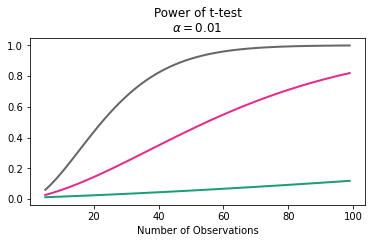

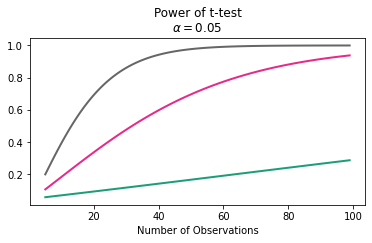

In [ ]:
#power vs. number of observations 
 alpha = [0.01,0.05] 
 for index, elem in enumerate(alpha):
      power_vs_observations(elem, index+1)


We observe that an increase in sample/effect size results in an increase in power. That is, the bigger the sample, the higher the power, keeping other parameters constant. 

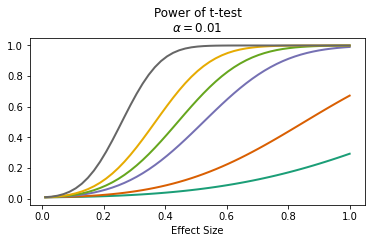

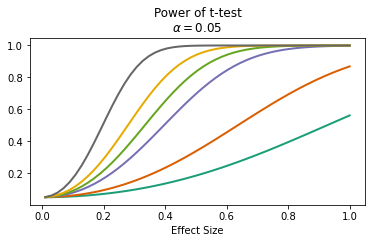

In [ ]:
#power vs effect size 
alpha = [0.01,0.05]
for index, elem in enumerate(alpha): 
    power_vs_effect(elem,index+1)

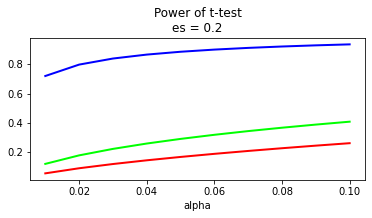

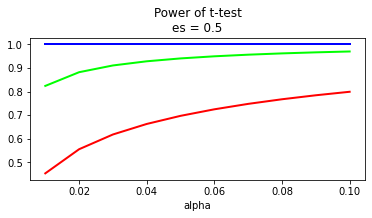

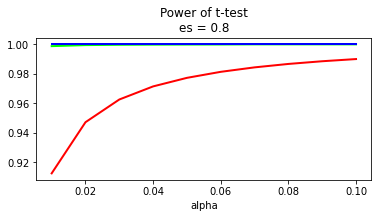

In [ ]:
#power vs. significance level 

effect_size = [0.2, 0.5, 0.8]
for index,elem in enumerate(effect_size): 
    power_vs_significance_level(elem, index+1)


### Chi-squared Goodness of fit

The chi-squared goodness of fit test of Pearson's chi-squared test is used to assess whether a set of categorical data is consistent with proposed values for the parameters. 

In [ ]:
import scipy
import numpy as np 
import matplotlib.pyplot as plt


In [ ]:
#Data  
np.random.seed(123)
N = 1000 
observed_values = np.random.normal(size=N)
expected_values = np.random.normal(size=N) + 2*x+1

scipy.stats.chisquare(observed_values, f_exp=expected_values)

Power_divergenceResult(statistic=949.8539646726026, pvalue=0.8650031172521822)

The scipy.stats.chisquare function returns the first value in the tuple which is the chi-squared value and the second value is the p-value computed using degree of freedom = number of values in array - 1 

## Confidence Interval and Hypothesis Testing

We will use the confidence interval to determine how accurate our sample mean estimation is. 

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import math

**Confidence Interval: **

To estimate the range of population mean, we define the standard error of the mean: 

SE = sigma/sqrt(n), 
                  sigma = sample std
                  n = sample size 

If we want to estimate an interval of the population so that 95% of the time the interval will contain the population mean, the interval is calculated as: 

(mu -1.96 * SE, mu + 1.96*SE) 

where mu is the sample mean and SE is the standard error 

The above interval is called confidence interval. 

We usually use 1.96 to calculate a 95% confidence interval since the sample mean follows a normal distribution. 

In [ ]:
def data_generator(mu,sigma, size): 
    data = np.random.normal(mu, sigma, size)
    return data 

In [ ]:
def confidence_interval(sample_mu, standard_error): 
  return ("{0:.2f}".format(sample_mu-1.96 * standard_error), "{0:2f}".format(sample_mu + 1.96*standard_error))


In [ ]:
#mu -> mean, sigma -> standard deviation 
mu_pop = 30 
sigma_pop = 7 

mu_sample = 27 
sigma_sample = 0.7 

size_sample = 100 
size_pop = 1000

population = data_generator(mu_pop, sigma_pop, size_pop)
sample = data_generator(mu_sample, sigma_sample, size_sample)

#Obtain a 95% confidence interval 
print("100 meds with 95% confidence interval", confidence_interval(mu_sample, sigma_sample/math.sqrt(size_sample)))
print("1000 meds with 95% confidence interval", confidence_interval(mu_pop, sigma_pop/math.sqrt(size_pop) ))

100 meds with 95% confidence interval ('26.86', '27.137200')
1000 meds with 95% confidence interval ('29.57', '30.433864')


From our results, we can note that a 95% confidence interval becomes narrower that is if we increase sample size from 100 to 1000. 

Assuming that N is positive infinite, then we will have lim n->infinity sigma/sqrt(n) = 0. In other words, the confidence interval will become the sample mean! 